In [65]:
# Manejo de datos/dataframes
!pip install pandas

# Jupyter 
!pip install ipywidgets

# Cálculo, Estadística, ML...
!pip install scipy
!pip install scikit-learn

# Visualizacion
!pip install matplotlib
!pip install seaborn
!pip install plotly==5.18.0
#* Requisito para ploty
!pip install nbformat>=4.2.0

# Automated EDA
!pip install ydata-profiling
!pip install sweetviz

zsh:1: 4.2.0 not found


In [66]:
import warnings
from scipy import stats

import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Solamente para evitar warnings de la libreria seaborn
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [86]:
df = pd.read_csv('./horas.csv')
df.head()
df.describe().T
df.dtypes
df['Time Tracked'].head()




0    50400000
1     5400000
2      352775
3      201111
4     1898749
Name: Time Tracked, dtype: int64

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3269537917.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3269537917.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()


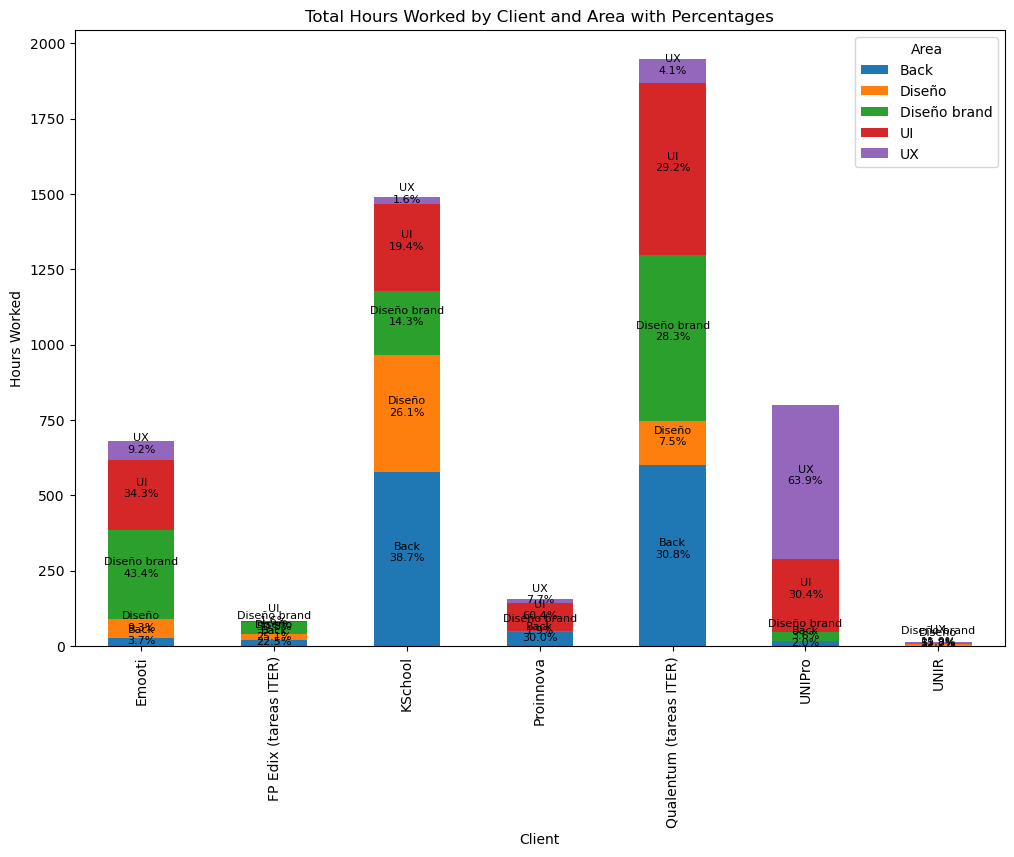

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'Esther Martínez': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por cliente (Folder Name) y área
client_area_hours = filtered_data.groupby(['Folder Name', 'Area'])['Hours Worked'].sum().reset_index()

# Calcular el total de horas por cliente para los porcentajes
total_hours_by_client = client_area_hours.groupby('Folder Name')['Hours Worked'].sum().reset_index()
client_area_hours = client_area_hours.merge(total_hours_by_client, on='Folder Name', suffixes=('', '_Total'))

# Calcular el porcentaje de cada área respecto al total del cliente
client_area_hours['Percentage'] = client_area_hours['Hours Worked'] / client_area_hours['Hours Worked_Total'] * 100

# Preparar los datos para el gráfico de barras estratificado
pivot_data = client_area_hours.pivot(index='Folder Name', columns='Area', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(12,8))

# Añadir el nombre del área y el porcentaje en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # Solo mostrar si la barra tiene altura
        # Asumiendo que bar.get_x() devuelve un índice de posición, necesitamos mapearlo al nombre del cliente
        client_name = pivot_data.index[int(bar.get_x() + bar.get_width() / 2)]
        
        # Filtrar el dataframe por el nombre del cliente y la altura de la barra
        filtered_df = client_area_hours[(client_area_hours['Folder Name'] == client_name) & 
                                        (abs(client_area_hours['Hours Worked'] - height) < 0.01)]
        
        # Comprobar si hay filas que coincidan con el filtro
        if not filtered_df.empty:
            area = filtered_df['Area'].values[0]
            percentage = filtered_df['Percentage'].values[0]
            text = f"{area}\n{percentage:.1f}%"
            ax.annotate(text, 
                        (bar.get_x() + bar.get_width() / 2, 
                         bar.get_y() + height / 2),
                        ha='center', va='center',
                        size=8, xytext=(0, 5),
                        textcoords='offset points')

plt.title('Total Hours Worked by Client and Area with Percentages')
plt.xlabel('Client')
plt.ylabel('Hours Worked')
plt.legend(title='Area')

# Mostrar el gráfico
plt.show()




/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/334183417.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/334183417.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()


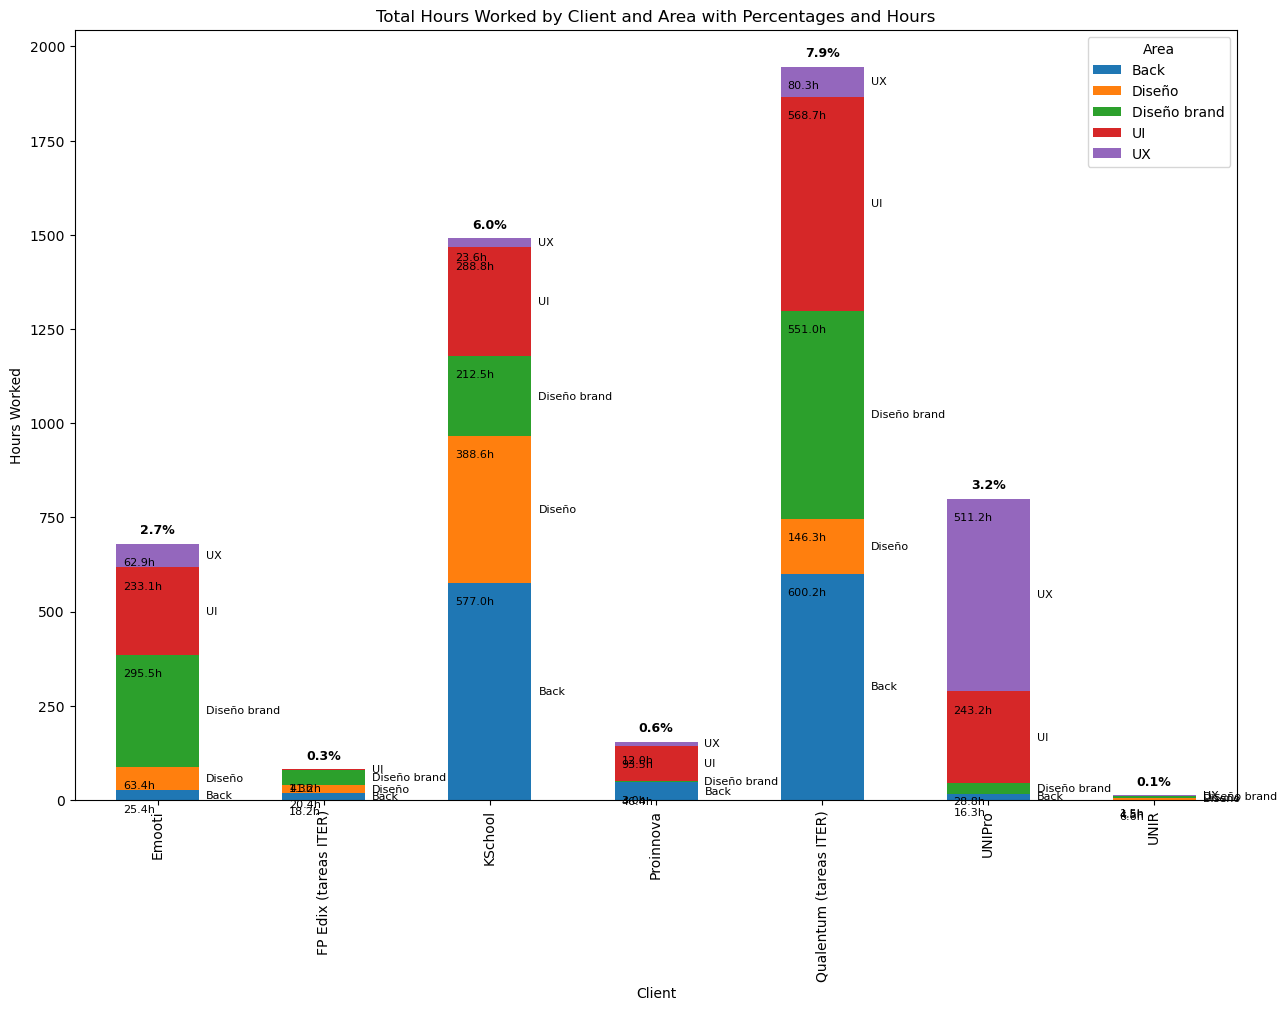

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'Esther Martínez': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por cliente (Folder Name) y área
client_area_hours = filtered_data.groupby(['Folder Name', 'Area'])['Hours Worked'].sum().reset_index()

# Calcular el total de horas por cliente para los porcentajes
total_hours_by_client = client_area_hours.groupby('Folder Name')['Hours Worked'].sum().reset_index()
client_area_hours = client_area_hours.merge(total_hours_by_client, on='Folder Name', suffixes=('', '_Total'))

# Calcular el porcentaje de cada área respecto al total del cliente
client_area_hours['Percentage'] = client_area_hours['Hours Worked'] / client_area_hours['Hours Worked_Total'] * 100

# Preparar los datos para el gráfico de barras estratificado
pivot_data = client_area_hours.pivot(index='Folder Name', columns='Area', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15,10))

# Inicializar un diccionario para almacenar las sumas de horas por cliente
total_hours_per_client = {}

# Añadir el nombre del área, el número de horas y el porcentaje en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height > 0:  # Solo mostrar si la barra tiene altura
        client_name = pivot_data.index[int(x + width / 2)]
        total_hours_per_client[client_name] = total_hours_per_client.get(client_name, 0) + height  # Sumar las horas
        
        # Filtrar el dataframe por el nombre del cliente y la altura de la barra
        filtered_df = client_area_hours[(client_area_hours['Folder Name'] == client_name) & 
                                        (abs(client_area_hours['Hours Worked'] - height) < 0.01)]
        
        if not filtered_df.empty:
            area = filtered_df['Area'].values[0]
            percentage = filtered_df['Percentage'].values[0]
            hours = filtered_df['Hours Worked'].values[0]
            
            # Añadir el nombre del área al medio derecho del estrato
            ax.annotate(area,
                        xy=(x + width, y + height/2),
                        xytext=(5, 0),
                        textcoords='offset points',
                        ha='left', va='center',
                        size=8)
            
            # Añadir el número de horas a la parte superior izquierda del estrato
            ax.annotate(f"{hours:.1f}h",
                        xy=(x, y + height),
                        xytext=(5, -10),
                        textcoords='offset points',
                        ha='left', va='top',
                        size=8)
            
# Añadir el porcentaje total de horas de cada barra en la parte superior de la misma
for client, total_hours in total_hours_per_client.items():
    total_percentage = total_hours / client_area_hours['Hours Worked_Total'].sum() * 100
    client_index = list(pivot_data.index).index(client)
    ax.annotate(f"{total_percentage:.1f}%",
                xy=(client_index, total_hours),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                size=9, weight='bold')

plt.title('Total Hours Worked by Client and Area with Percentages and Hours')
plt.xlabel('Client')
plt.ylabel('Hours Worked')
plt.legend(title='Area')

# Mostrar el gráfico
plt.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3490533661.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3490533661.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()


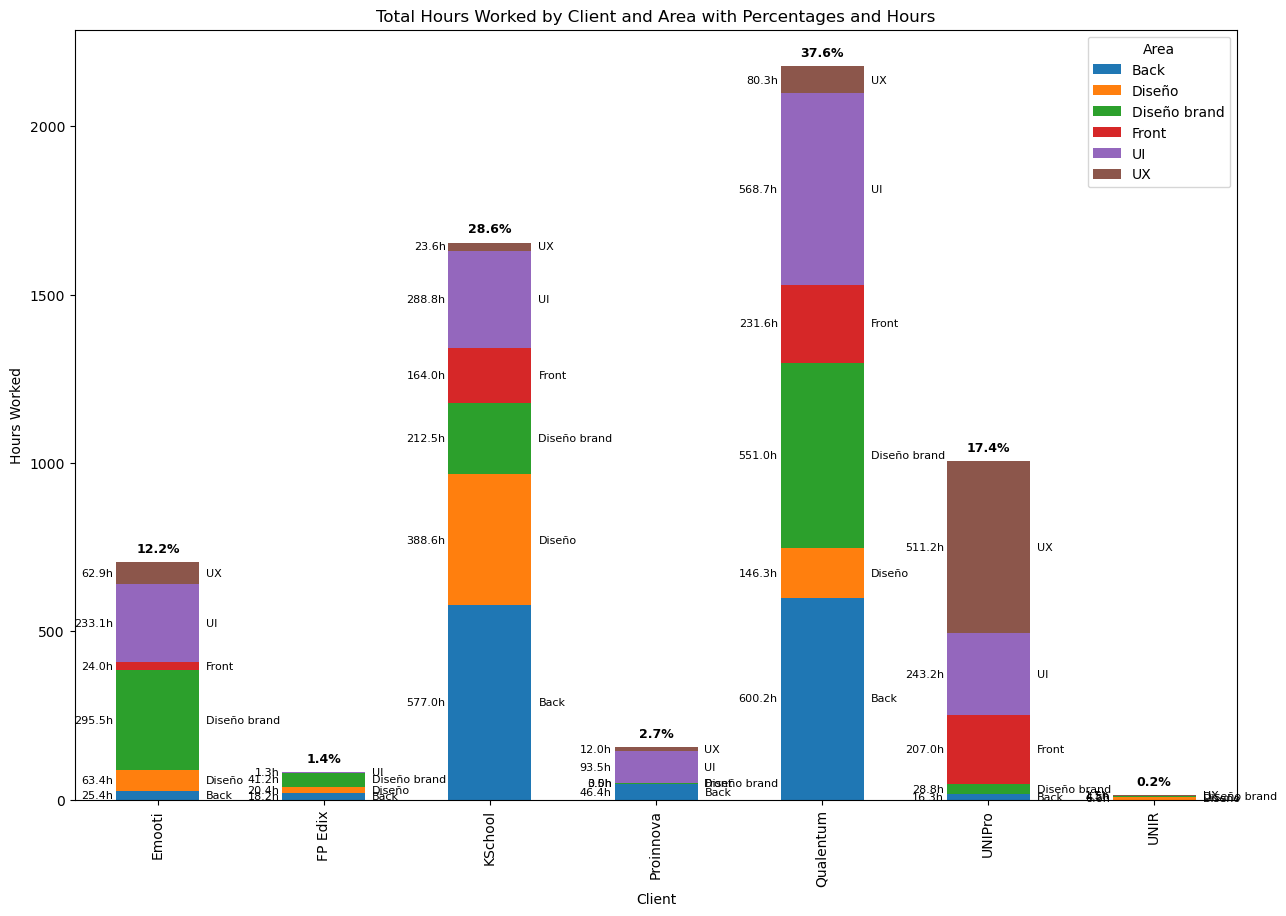

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por cliente (Folder Name) y área
client_area_hours = filtered_data.groupby(['Folder Name', 'Area'])['Hours Worked'].sum().reset_index()

# Calcular el total de horas por cliente para los porcentajes
total_hours_by_client = client_area_hours.groupby('Folder Name')['Hours Worked'].sum().reset_index()
client_area_hours = client_area_hours.merge(total_hours_by_client, on='Folder Name', suffixes=('', '_Total'))

# Calcular el porcentaje de cada área respecto al total del cliente
client_area_hours['Percentage'] = client_area_hours['Hours Worked'] / client_area_hours['Hours Worked_Total'] * 100

# Preparar los datos para el gráfico de barras estratificado
pivot_data = client_area_hours.pivot(index='Folder Name', columns='Area', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15,10))

# Calcular el total general de horas para calcular los porcentajes
grand_total_hours = client_area_hours['Hours Worked'].sum()

# Añadir el nombre del área y el número de horas en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height > 0:  # Solo mostrar si la barra tiene altura
        client_name = pivot_data.index[int(x + width / 2)]
        
        # Filtrar el dataframe por el nombre del cliente y la altura de la barra
        filtered_df = client_area_hours[(client_area_hours['Folder Name'] == client_name) & 
                                        (abs(client_area_hours['Hours Worked'] - height) < 0.01)]
        
        if not filtered_df.empty:
            area = filtered_df['Area'].values[0]
            hours = filtered_df['Hours Worked'].values[0]
            
            # Añadir el nombre del área al medio derecho del estrato
            ax.annotate(area,
                        xy=(x + width, y + height/2),
                        xytext=(5, 0),
                        textcoords='offset points',
                        ha='left', va='center',
                        size=8)
            
            # Añadir el número de horas a la izquierda, centrado verticalmente en el estrato
            ax.annotate(f"{hours:.1f}h",
                        xy=(x, y + height/2),
                        xytext=(-2, 0),
                        textcoords='offset points',
                        ha='right', va='center',
                        size=8)

# Añadir el porcentaje total de horas de cada cliente en la parte superior de la barra
for index, (client, total_hours) in enumerate(total_hours_by_client.itertuples(index=False)):
    client_percentage = total_hours / grand_total_hours * 100
    ax.annotate(f"{client_percentage:.1f}%",
                xy=(index, total_hours),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                size=9, weight='bold')

plt.title('Total Hours Worked by Client and Area with Percentages and Hours')
plt.xlabel('Client')
plt.ylabel('Hours Worked')
plt.legend(title='Area')

# Mostrar el gráfico
plt.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/1074118263.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/1074118263.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()


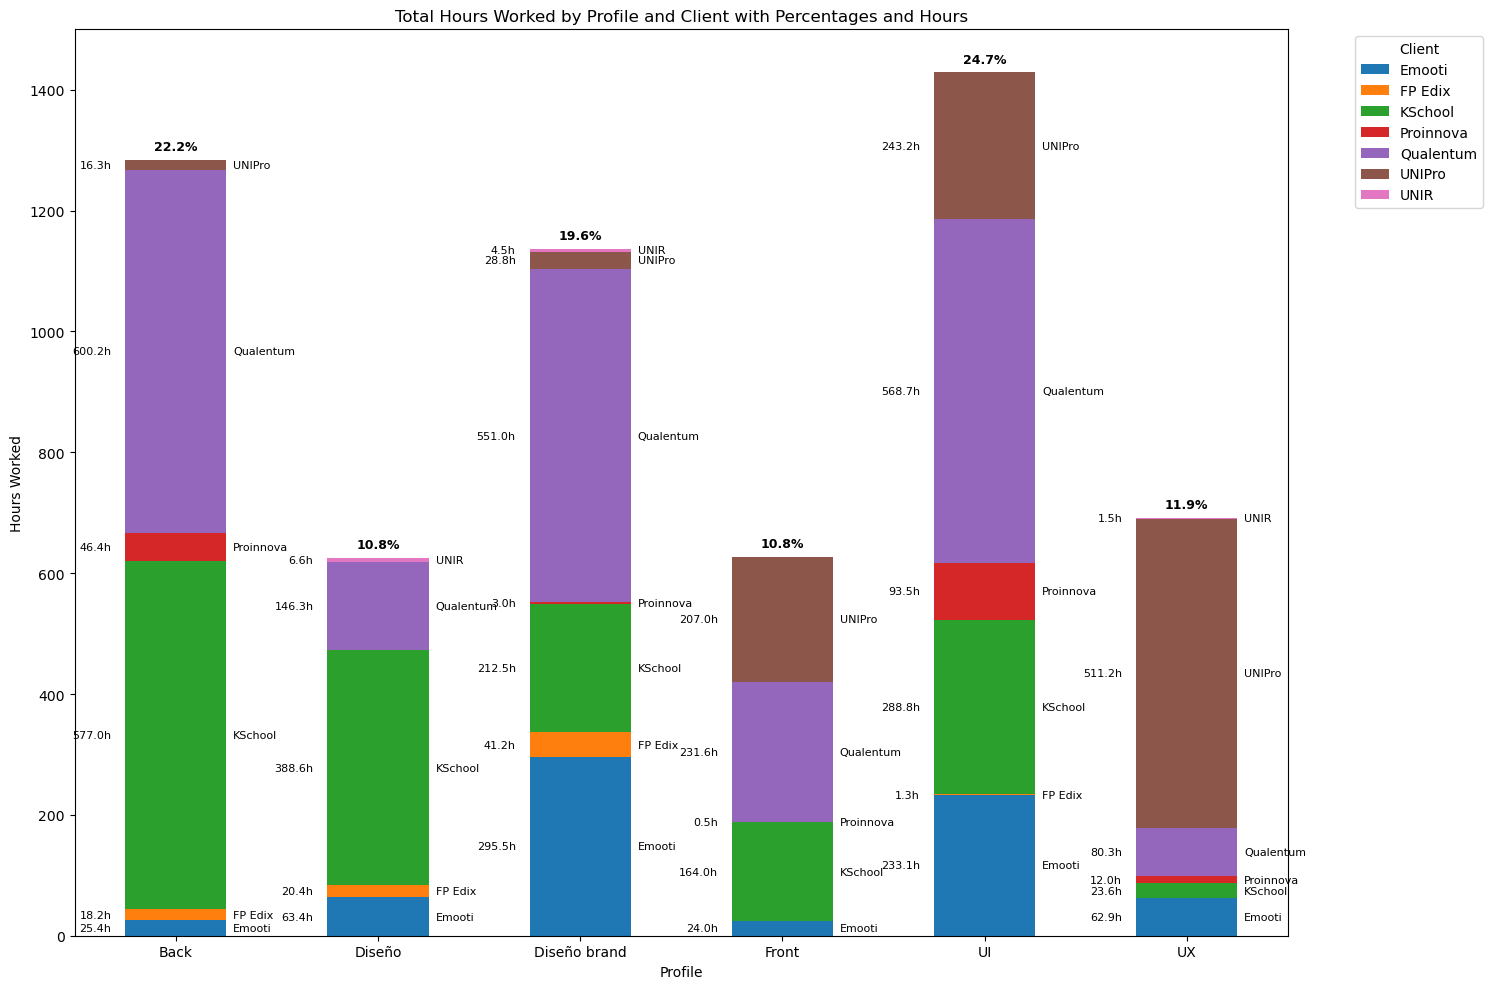

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
profile_client_hours = filtered_data.groupby(['Area', 'Folder Name'])['Hours Worked'].sum().reset_index()

# Calcular el total de horas por perfil para los porcentajes
total_hours_by_profile = profile_client_hours.groupby('Area')['Hours Worked'].sum().reset_index()
profile_client_hours = profile_client_hours.merge(total_hours_by_profile, on='Area', suffixes=('', '_Total'))

# Calcular el porcentaje de cada cliente respecto al total del perfil
profile_client_hours['Percentage'] = profile_client_hours['Hours Worked'] / profile_client_hours['Hours Worked_Total'] * 100

# Preparar los datos para el gráfico de barras estratificado
pivot_data = profile_client_hours.pivot(index='Area', columns='Folder Name', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15,10))

# Calcular el total general de horas para calcular los porcentajes
grand_total_hours = profile_client_hours['Hours Worked'].sum()

# Añadir el nombre del cliente y el número de horas en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height > 0:  # Solo mostrar si la barra tiene altura
        profile_name = pivot_data.index[int(x + width / 2)]
        
        # Filtrar el dataframe por el perfil y la altura de la barra
        filtered_df = profile_client_hours[(profile_client_hours['Area'] == profile_name) & 
                                           (abs(profile_client_hours['Hours Worked'] - height) < 0.01)]
        
        if not filtered_df.empty:
            client = filtered_df['Folder Name'].values[0]
            hours = filtered_df['Hours Worked'].values[0]
            
            # Añadir el nombre del cliente al medio derecho del estrato
            ax.annotate(client,
                        xy=(x + width, y + height/2),
                        xytext=(5, 0),
                        textcoords='offset points',
                        ha='left', va='center',
                        size=8)
            
            # Añadir el número de horas a la izquierda, centrado verticalmente en el estrato
            ax.annotate(f"{hours:.1f}h",
                        xy=(x, y + height/2),
                        xytext=(-10, 0),
                        textcoords='offset points',
                        ha='right', va='center',
                        size=8)

# Añadir el porcentaje total de horas de cada perfil en la parte superior de la barra
for index, (profile, total_hours) in enumerate(total_hours_by_profile.itertuples(index=False)):
    profile_percentage = total_hours / grand_total_hours * 100
    ax.annotate(f"{profile_percentage:.1f}%",
                xy=(index, total_hours),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                size=9, weight='bold')

plt.title('Total Hours Worked by Profile and Client with Percentages and Hours')
plt.xlabel('Profile')
plt.ylabel('Hours Worked')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Poner todas las leyendas del eje X en horizontal
plt.xticks(rotation=0)

# Ajustar el layout para acomodar la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/522599457.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/522599457.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()


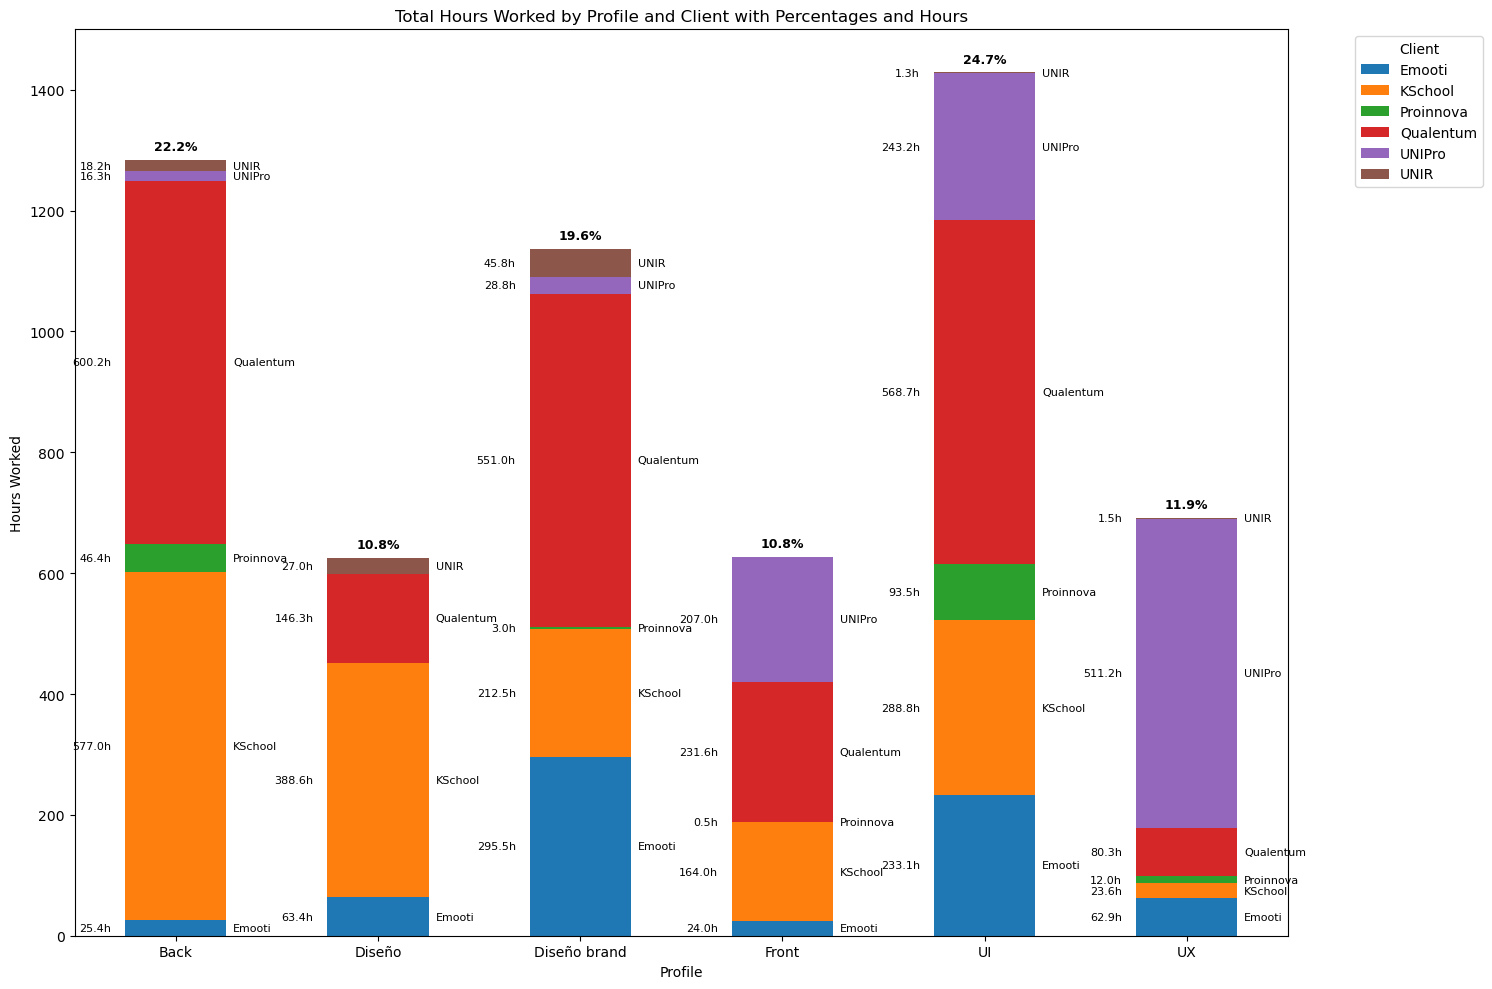

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga los datos
data = pd.read_csv('./horas.csv')

# Asegúrate de que las columnas 'Start' y 'Stop' existen y son convertibles a datetime
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Verifica que todas las columnas necesarias estén presentes antes de continuar
if not all(col in filtered_data.columns for col in ['Folder Name', 'Area', 'Hours Worked']):
    raise ValueError("Una o más columnas necesarias no están presentes en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
profile_client_hours = filtered_data.groupby(['Area', 'Folder Name'])['Hours Worked'].sum().reset_index()

# Identificar y sumar las horas de FP Edix y UNIR
profile_client_hours['Folder Name'] = profile_client_hours['Folder Name'].replace(['FP Edix', 'UNIR'], 'UNIR')
grouped_hours = profile_client_hours.groupby(['Area', 'Folder Name']).agg({'Hours Worked': 'sum'}).reset_index()

# Calcular el total general de horas para calcular los porcentajes
grand_total_hours = grouped_hours['Hours Worked'].sum()

# Preparar los datos para el gráfico de barras estratificado
pivot_data = grouped_hours.pivot(index='Area', columns='Folder Name', values='Hours Worked').fillna(0)

# Crear el gráfico de barras estratificado
ax = pivot_data.plot(kind='bar', stacked=True, figsize=(15,10))

# Añadir el nombre del cliente y el número de horas en cada estrato de las barras
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    
    if height > 0:  # Solo mostrar si la barra tiene altura
        profile_name = pivot_data.index[int(x + width / 2)]
        
        # Filtrar el dataframe por el perfil y la altura de la barra
        filtered_df = grouped_hours[(grouped_hours['Area'] == profile_name) & 
                                    (abs(grouped_hours['Hours Worked'] - height) < 0.01)]
        
        if not filtered_df.empty:
            client = filtered_df['Folder Name'].values[0]
            hours = filtered_df['Hours Worked'].values[0]
            
            # Añadir el nombre del cliente al medio derecho del estrato
            ax.annotate(client,
                        xy=(x + width, y + height/2),
                        xytext=(5, 0),
                        textcoords='offset points',
                        ha='left', va='center',
                        size=8)
            
            # Añadir el número de horas a la izquierda, centrado verticalmente en el estrato
            ax.annotate(f"{hours:.1f}h",
                        xy=(x, y + height/2),
                        xytext=(-10, 0),
                        textcoords='offset points',
                        ha='right', va='center',
                        size=8)

# Añadir el porcentaje total de horas de cada perfil en la parte superior de la barra
for index, profile in enumerate(pivot_data.index):
    total_hours = pivot_data.loc[profile].sum()
    profile_percentage = total_hours / grand_total_hours * 100
    ax.annotate(f"{profile_percentage:.1f}%",
                xy=(index, total_hours),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom',
                size=9, weight='bold')

plt.title('Total Hours Worked by Profile and Client with Percentages and Hours')
plt.xlabel('Profile')
plt.ylabel('Hours Worked')
plt.legend(title='Client', bbox_to_anchor=(1.05, 1), loc='upper left')

# Poner todas las leyendas del eje X en horizontal
plt.xticks(rotation=0)

# Ajustar el layout para acomodar la leyenda
plt.tight_layout()

# Mostrar el gráfico
plt.show()


# Mapa de calor

In [24]:
import pandas as pd
import plotly.express as px

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
grouped_hours = filtered_data.groupby(['Area', 'Folder Name'])['Hours Worked'].sum().reset_index()

# Crear un mapa de calor
fig = px.density_heatmap(grouped_hours, x='Folder Name', y='Area', z='Hours Worked', 
                         color_continuous_scale='Viridis', title='Hours Worked by Profile and Client')

# Mostrar el gráfico
fig.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3265610140.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/3265610140.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Treemap

In [27]:
import pandas as pd
import plotly.express as px

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
grouped_hours = filtered_data.groupby(['Area', 'Folder Name'])['Hours Worked'].sum().reset_index()

# Crear un Treemap
fig = px.treemap(grouped_hours, path=['Area', 'Folder Name'], values='Hours Worked',
                 color='Hours Worked', color_continuous_scale='RdYlGn', 
                 title='Treemap of Hours Worked by Profile and Client')

# Mostrar el gráfico
fig.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/999555830.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/999555830.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Burbujas

In [28]:
import pandas as pd
import plotly.express as px

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas con la corrección para 'esther'
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'  # Corregido a 'esther'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(Tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Agrupar los datos por área (perfil) y cliente
grouped_hours = filtered_data.groupby(['Area', 'Folder Name'])['Hours Worked'].sum().reset_index()

# Crear un gráfico de burbujas
fig = px.scatter(grouped_hours, x='Folder Name', y='Area', size='Hours Worked', color='Area',
                 hover_name='Folder Name', size_max=60, 
                 title='Bubble Chart of Hours Worked by Profile and Client')

# Mostrar el gráfico
fig.show()


/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/1718553876.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/1718553876.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Radar o Araña

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/4004504623.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4_/ktqvdskd17d99s6ddpc3_6th0000gp/T/ipykernel_64295/4004504623.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Estructura de grouped_hours:
 Area               Back      Diseño  Diseño brand       Front          UI  \
Folder Name                                                                 
Emooti        25.390955   63.426407    295.500000   24.000000  233.050380   
FP Edix       18.250000   20.406539     41.250000    0.000000    1.334482   
KSchool      577.005819  388.620185    212.501255  164.000000  288.772205   
Proinnova     46.423078    0.000000      3.000000    0.500000   93.526845   
Qualentum    600.242894  146.285365    551.000554  231.630306  568.748852   

Area                UX  
Folder Name             
Emooti       62.916667  
FP Edix       0.000000  
KSchool      23.584031  
Proinnova    12.000000  
Qualentum    80.250338  


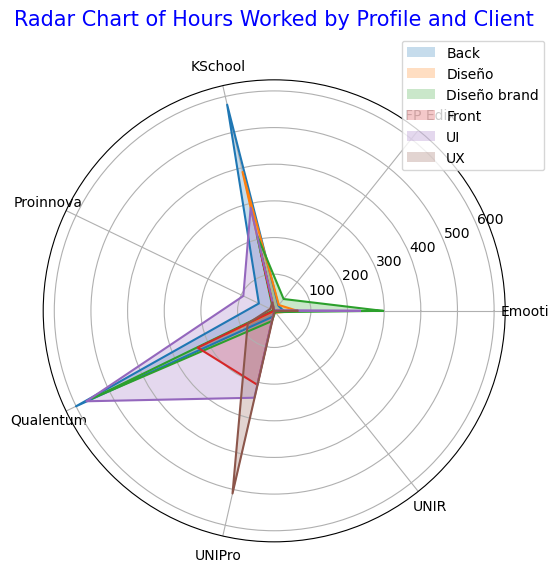

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import widgets, VBox

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Mapeo de usuarios a áreas con la corrección para 'esther'
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Excluir a los usuarios no deseados y aplicar el mapeo
if 'Username' in data.columns:
    filtered_data = data[~data['Username'].isin(['Jesús Martín Mejías', 'Mery del Pozo'])]
    filtered_data['Area'] = filtered_data['Username'].map(user_to_area)
else:
    raise ValueError("La columna 'Username' no se encuentra en el DataFrame.")

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Agrupar los datos por cliente y área
grouped_hours = filtered_data.groupby(['Folder Name', 'Area'])['Hours Worked'].sum().unstack('Area').fillna(0)

# Verificar la estructura de grouped_hours
print("Estructura de grouped_hours:\n", grouped_hours.head())  # Verifica la estructura de tus datos

# Obtener los nombres de los clientes y las áreas
clients = grouped_hours.index.tolist()
areas = grouped_hours.columns.tolist()

# Número de variables (clientes)
num_vars = len(clients)

# Calcular el ángulo de cada eje en el gráfico (divide el círculo completo en partes iguales)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Completar el círculo

# Iniciar la figura de Matplotlib
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Dibujar una línea por cada perfil (área) y guardar las referencias para la interactividad
lines = {}
fills = {}
for area in grouped_hours:
    values = grouped_hours[area].values.tolist()
    values += values[:1]  # Completar el círculo
    fill = ax.fill(angles, values, label=area, alpha=0.25)  # fill es una lista de objetos Patch
    line, = ax.plot(angles, values)  # line es un objeto Line2D
    fills[area] = fill[0]  # Almacenar la referencia directa al objeto Patch
    lines[area] = line  # Almacenar la referencia directa al objeto Line2D
    
# Función para actualizar la visibilidad de la leyenda y las líneas
def update_legend(area, visible):
    lines[area].set_visible(visible)
    fills[area].set_visible(visible)
    plt.draw()

# Etiquetas para los clientes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(clients)

# Título del gráfico y leyenda
plt.title('Radar Chart of Hours Worked by Profile and Client', size=15, color='blue', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Mostrar el gráfico
plt.show()


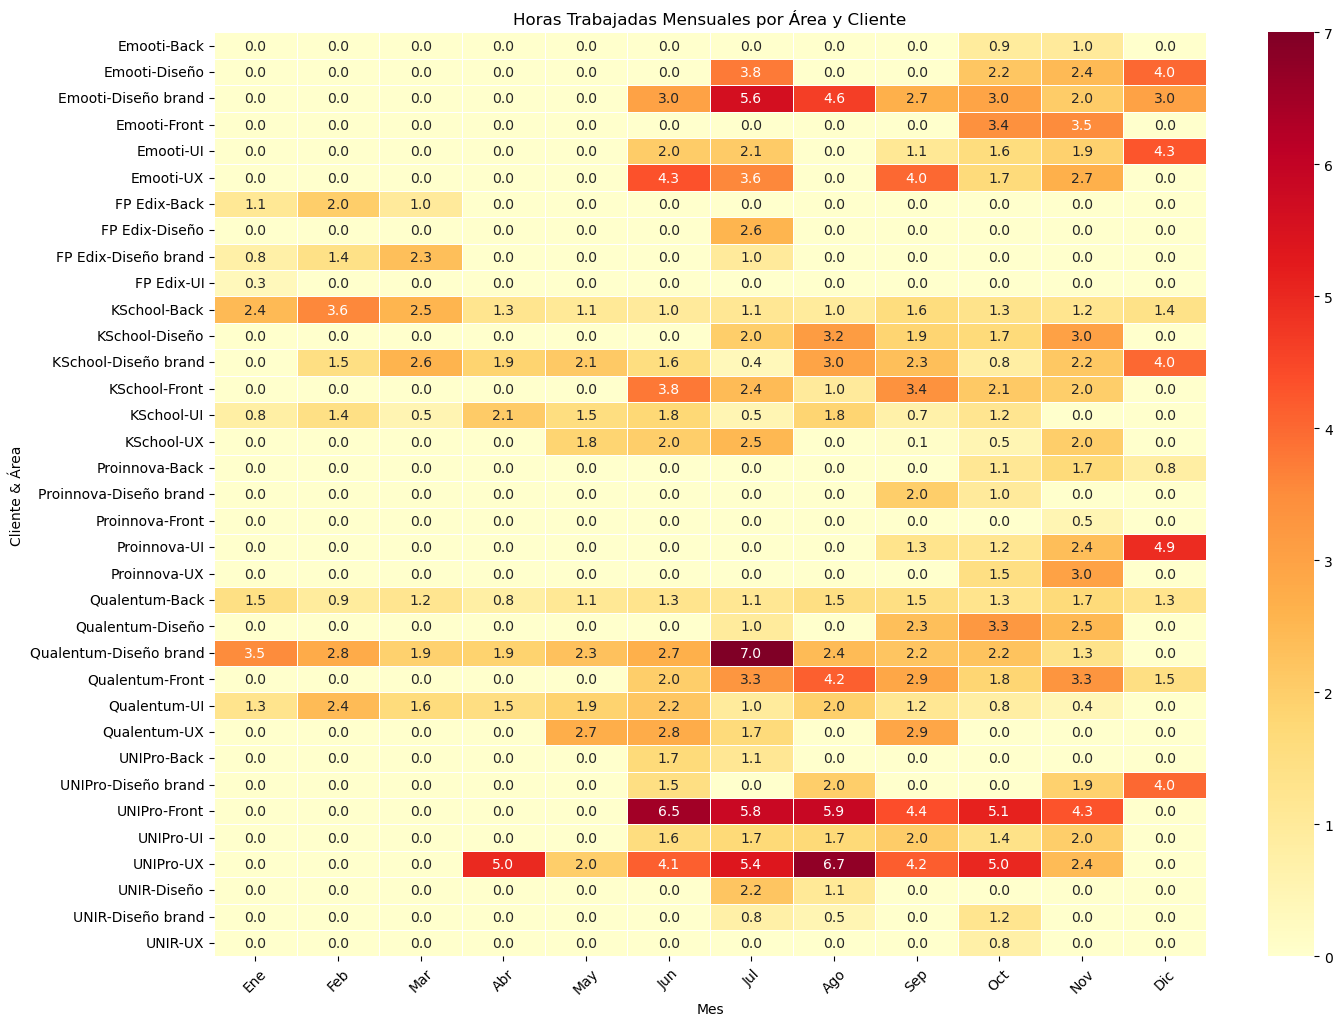

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las abreviaturas de los nombres de los meses en español
meses_es = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

# Carga los datos
data = pd.read_csv('./horas.csv')

# Convertir las columnas de tiempo a datetime y calcular las horas trabajadas
if 'Start' in data.columns and 'Stop' in data.columns:
    data['Start'] = pd.to_datetime(data['Start'], unit='ms', errors='coerce')
    data['Stop'] = pd.to_datetime(data['Stop'], unit='ms', errors='coerce')
    data['Hours Worked'] = (data['Stop'] - data['Start']).dt.total_seconds() / 3600
else:
    raise ValueError("Las columnas 'Start' y 'Stop' no se encuentran en el DataFrame.")

# Definir el mapeo de usuarios a áreas
user_to_area = {
    'César García Díaz': 'Diseño brand',
    'Clara Terradillos': 'Diseño',
    'Soraya Martínez Rius': 'UX',
    'Alex Fernández': 'UI',
    'Antonio Blanco': 'Back',
    'esther': 'Front'
}

# Asegúrate de que tienes un DataFrame filtrado
filtered_data = data.copy()

# Aplicar el mapeo al dataframe
filtered_data['Area'] = filtered_data['Username'].map(user_to_area)

# Quitar el texto "(Tareas ITER)" de los nombres de los clientes
if 'Folder Name' in filtered_data.columns:
    filtered_data['Folder Name'] = filtered_data['Folder Name'].str.replace(r"\(tareas ITER\)", "", regex=True).str.strip()
else:
    raise ValueError("La columna 'Folder Name' no se encuentra en el DataFrame.")

# Crear etiquetas combinadas de cliente y área para el eje Y
filtered_data['Client-Area'] = filtered_data['Folder Name'] + "-" + filtered_data['Area']

# Asegúrate de que las columnas 'Year' y 'MonthNum' existen
filtered_data['Year'] = filtered_data['Start'].dt.year
filtered_data['MonthNum'] = filtered_data['Start'].dt.month

# Ordenar por año y mes antes de pivotear
filtered_data.sort_values(by=['Year', 'MonthNum'], inplace=True)

# Crear una nueva tabla pivote para el mapa de calor
area_heatmap_data = filtered_data.pivot_table(values='Hours Worked', index='Client-Area', columns='MonthNum', fill_value=0)

# Convertir los números de mes en la tabla pivote a nombres en español para la visualización
new_columns = [meses_es[month_num-1] for month_num in area_heatmap_data.columns]
area_heatmap_data.columns = new_columns

# Configurar el tamaño del gráfico
plt.figure(figsize=(16, 12))

# Crear el mapa de calor para los datos de área
sns.heatmap(area_heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="YlOrRd")

# Títulos y etiquetas
plt.title('Horas Trabajadas Mensuales por Área y Cliente')
plt.ylabel('Cliente & Área')
plt.xlabel('Mes')

# Ajustar las etiquetas del eje X para mostrar los nombres de los meses en español
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()